In [61]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import patsy

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn import metrics

%pylab inline
%config InlineBackend.figure_formats = ['retina']

Populating the interactive namespace from numpy and matplotlib


In [62]:
df=pd.read_csv('Disney_Wait_final.csv')

In [63]:
df

,Date,datetime,Wait_Time,Temp_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Wind_Gust_(mph),Pressure_(in),Precip_(in),...,Hour_23,Month_5,Month_6,Month_7,Month_8,Month_9,HOLIDAYPX,WDW_TICKET_SEASON_peak,WDW_TICKET_SEASON_regular,WDW_TICKET_SEASON_value
0,2018-05-01,2018-05-01 09:07:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
1,2018-05-01,2018-05-01 09:14:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
2,2018-05-01,2018-05-01 09:21:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
3,2018-05-01,2018-05-01 09:27:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
4,2018-05-01,2018-05-01 09:35:00,10.0,77.0,62.0,60.0,10.0,0.0,30.12,0.0,...,0,1,0,0,0,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18352,2018-08-31,2018-08-31 23:35:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1
18353,2018-08-31,2018-08-31 23:42:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1
18354,2018-08-31,2018-08-31 23:49:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1
18355,2018-08-31,2018-08-31 23:56:00,5.0,80.0,76.0,87.0,6.0,0.0,29.98,0.0,...,1,0,0,0,1,0,4,0,0,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18357 entries, 0 to 18356
Data columns (total 47 columns):
Date                         18357 non-null object
datetime                     18357 non-null object
Wait_Time                    18357 non-null float64
Temp_(F)                     18307 non-null float64
Dew_Point_(F)                18307 non-null float64
Humidity_(%)                 18307 non-null float64
Wind_Speed_(mph)             18307 non-null float64
Wind_Gust_(mph)              18307 non-null float64
Pressure_(in)                18307 non-null float64
Precip_(in)                  18307 non-null float64
Day_of_the_Week_Friday       18357 non-null int64
Day_of_the_Week_Monday       18357 non-null int64
Day_of_the_Week_Saturday     18357 non-null int64
Day_of_the_Week_Sunday       18357 non-null int64
Day_of_the_Week_Thursday     18357 non-null int64
Day_of_the_Week_Tuesday      18357 non-null int64
Day_of_the_Week_Wednesday    18357 non-null int64
Hour_0                 

In [65]:
df.columns

Index(['Date', 'datetime', 'Wait_Time', 'Temp_(F)', 'Dew_Point_(F)',
       'Humidity_(%)', 'Wind_Speed_(mph)', 'Wind_Gust_(mph)', 'Pressure_(in)',
       'Precip_(in)', 'Day_of_the_Week_Friday', 'Day_of_the_Week_Monday',
       'Day_of_the_Week_Saturday', 'Day_of_the_Week_Sunday',
       'Day_of_the_Week_Thursday', 'Day_of_the_Week_Tuesday',
       'Day_of_the_Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_6',
       'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'HOLIDAYPX',
       'WDW_TICKET_SEASON_peak', 'WDW_TICKET_SEASON_regular',
       'WDW_TICKET_SEASON_value'],
      dtype='object')

In [66]:
smaller_df=df.loc[0:18355,['Wait_Time','Temp_(F)','Dew_Point_(F)','Humidity_(%)','Wind_Speed_(mph)',
                           'Wind_Gust_(mph)','Pressure_(in)','Precip_(in)','Day_of_the_Week_Friday', 
                           'Day_of_the_Week_Monday','Day_of_the_Week_Saturday', 'Day_of_the_Week_Sunday',
                           'Day_of_the_Week_Thursday', 'Day_of_the_Week_Tuesday',
                           'Day_of_the_Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_6',
                           'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
                           'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
                           'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Month_5',
                           'Month_6', 'Month_7', 'Month_8','WDW_TICKET_SEASON_peak', 'WDW_TICKET_SEASON_regular',
                           'WDW_TICKET_SEASON_value']]

In [67]:
smaller_df=smaller_df.loc[smaller_df['Wait_Time']<=145,:]

In [68]:
smaller_df.dropna(inplace=True)

In [69]:
smaller_df.describe()

,Wait_Time,Temp_(F),Dew_Point_(F),Humidity_(%),Wind_Speed_(mph),Wind_Gust_(mph),Pressure_(in),Precip_(in),Day_of_the_Week_Friday,Day_of_the_Week_Monday,...,Hour_21,Hour_22,Hour_23,Month_5,Month_6,Month_7,Month_8,WDW_TICKET_SEASON_peak,WDW_TICKET_SEASON_regular,WDW_TICKET_SEASON_value
count,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,...,18289.000000,18289.00000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000,18289.000000
mean,56.753404,81.713544,72.263437,74.733556,8.383017,2.456777,29.904424,0.024058,0.141178,0.139045,...,0.068456,0.04150,0.011154,0.239652,0.262562,0.256657,0.241129,0.207885,0.731478,0.060638
std,29.743613,5.713765,3.870150,15.796889,4.778343,7.702700,0.831987,0.112144,0.348214,0.346003,...,0.252534,0.19945,0.105026,0.426883,0.440038,0.436800,0.427780,0.405805,0.443203,0.238671
min,0.000000,68.000000,51.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,77.000000,71.000000,62.000000,5.000000,0.000000,29.880000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,82.000000,73.000000,76.000000,8.000000,0.000000,29.940000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,86.000000,75.000000,88.000000,12.000000,0.000000,29.990000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,145.000000,94.000000,80.000000,100.000000,37.000000,69.000000,30.150000,1.800000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18289 entries, 0 to 18355
Data columns (total 43 columns):
Wait_Time                    18289 non-null float64
Temp_(F)                     18289 non-null float64
Dew_Point_(F)                18289 non-null float64
Humidity_(%)                 18289 non-null float64
Wind_Speed_(mph)             18289 non-null float64
Wind_Gust_(mph)              18289 non-null float64
Pressure_(in)                18289 non-null float64
Precip_(in)                  18289 non-null float64
Day_of_the_Week_Friday       18289 non-null int64
Day_of_the_Week_Monday       18289 non-null int64
Day_of_the_Week_Saturday     18289 non-null int64
Day_of_the_Week_Sunday       18289 non-null int64
Day_of_the_Week_Thursday     18289 non-null int64
Day_of_the_Week_Tuesday      18289 non-null int64
Day_of_the_Week_Wednesday    18289 non-null int64
Hour_0                       18289 non-null int64
Hour_1                       18289 non-null int64
Hour_2                   

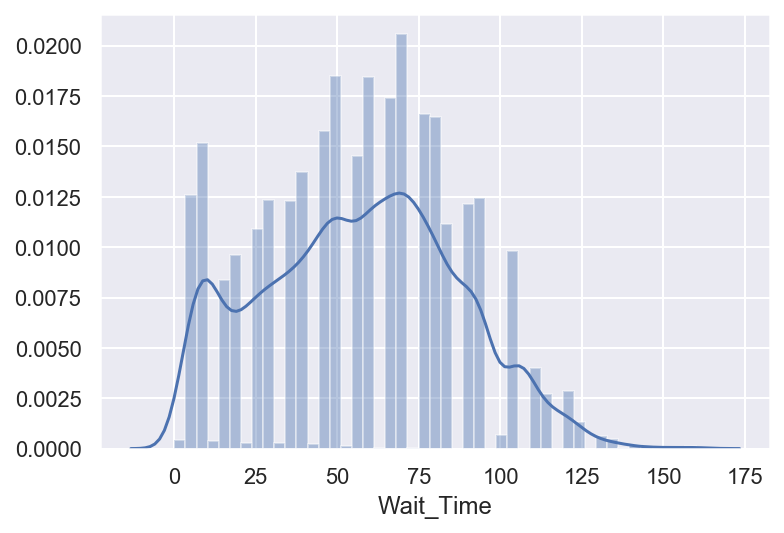

In [71]:
sns.distplot(df['Wait_Time'])

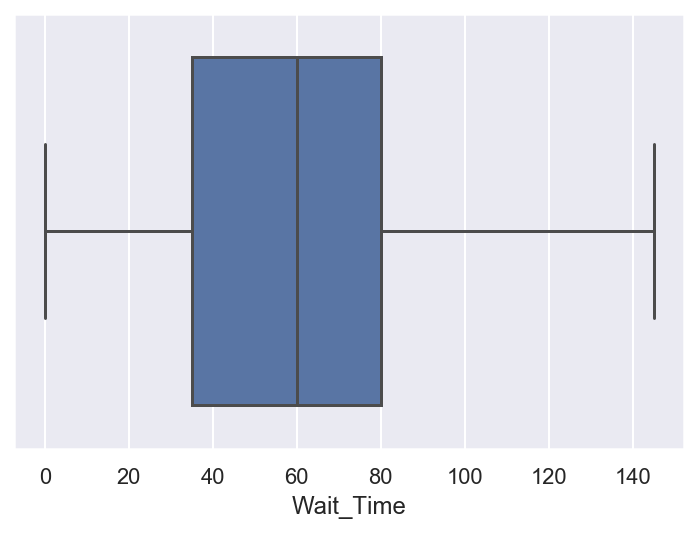

In [72]:
sns.boxplot(smaller_df['Wait_Time'])

In [73]:
X = smaller_df.loc[:,['Temp_(F)','Dew_Point_(F)','Humidity_(%)','Wind_Speed_(mph)',
                      'Wind_Gust_(mph)','Pressure_(in)','Precip_(in)','Day_of_the_Week_Friday',
                      'Day_of_the_Week_Monday','Day_of_the_Week_Saturday', 'Day_of_the_Week_Sunday',
                      'Day_of_the_Week_Thursday', 'Day_of_the_Week_Tuesday',
                      'Day_of_the_Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_6',
                      'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
                      'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
                      'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Month_5',
                      'Month_6', 'Month_7', 'Month_8','WDW_TICKET_SEASON_peak', 'WDW_TICKET_SEASON_regular',
                      'WDW_TICKET_SEASON_value']]

y = smaller_df['Wait_Time']

In [120]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    train_score=lr_model.score(X_train, y_train)
    
    # score fit model on validation data
    test_score = lr_model.score(X_test, y_test)
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('Test R^2 score was:', test_score)
    print('\nFeature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
    print('\nIntercept: ',lr_model.intercept_)
    
    pred = lr_model.predict(X_test) 
  
    MAE = metrics.mean_absolute_error(y_test,pred)
    MSE = metrics.mean_squared_error(y_test,pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,pred))
    print('\nMAE: ',MAE) 
    print('MSE: ',MSE) 
    print('RMSE: ',RMSE)
    
    sns.distplot((y_test-pred))

    
    plt.scatter(pred,y_test,alpha=0.2,color='#EE0022')
    plt.xlabel('Predicted Wait Time')
    plt.ylabel('Actual Wait Time')
    plt.xlim(0,120)
    plt.ylim(0,180)
    plt.grid(False_)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
pred = lr_model.predict(X_test) 

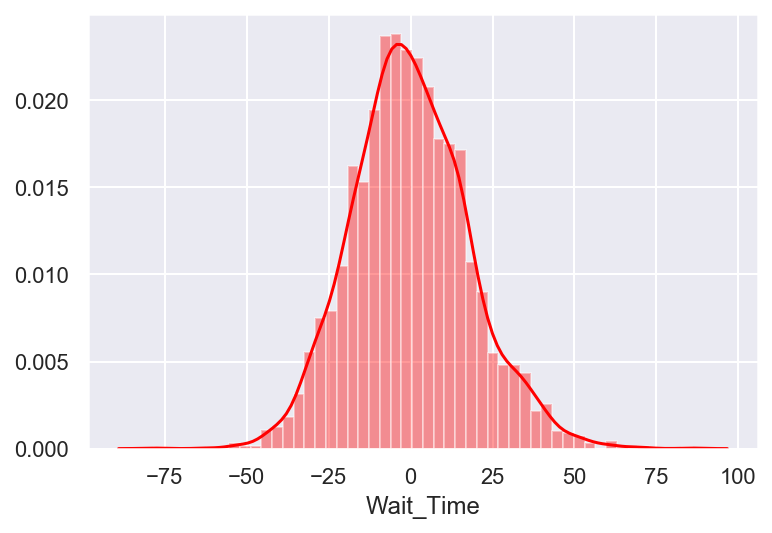

In [122]:
sns.distplot((y_test-pred), color='red')


Train R^2 score was: 0.647454256854771
Test R^2 score was: 0.6376955399959451

Feature coefficient results: 

Temp_(F) : -0.23
Dew_Point_(F) : 0.75
Humidity_(%) : -0.58
Wind_Speed_(mph) : 0.08
Wind_Gust_(mph) : 0.07
Pressure_(in) : -0.13
Precip_(in) : -5.18
Day_of_the_Week_Friday : -2.06
Day_of_the_Week_Monday : 3.37
Day_of_the_Week_Saturday : -5.03
Day_of_the_Week_Sunday : -10.65
Day_of_the_Week_Thursday : 3.86
Day_of_the_Week_Tuesday : 1.33
Day_of_the_Week_Wednesday : 9.18
Hour_0 : -32.05
Hour_1 : -46.75
Hour_2 : 0.00
Hour_6 : -0.00
Hour_7 : -31.91
Hour_8 : -36.80
Hour_9 : -25.02
Hour_10 : 0.37
Hour_11 : 16.18
Hour_12 : 27.23
Hour_13 : 30.81
Hour_14 : 26.02
Hour_15 : 19.14
Hour_16 : 25.73
Hour_17 : 22.14
Hour_18 : 21.27
Hour_19 : 17.33
Hour_20 : 9.78
Hour_21 : -14.15
Hour_22 : -13.25
Hour_23 : -16.09
Month_5 : -9.93
Month_6 : 10.96
Month_7 : 2.90
Month_8 : -3.93
WDW_TICKET_SEASON_peak : 11.90
WDW_TICKET_SEASON_regular : 5.61
WDW_TICKET_SEASON_value : -17.51

Intercept:  49.810105123

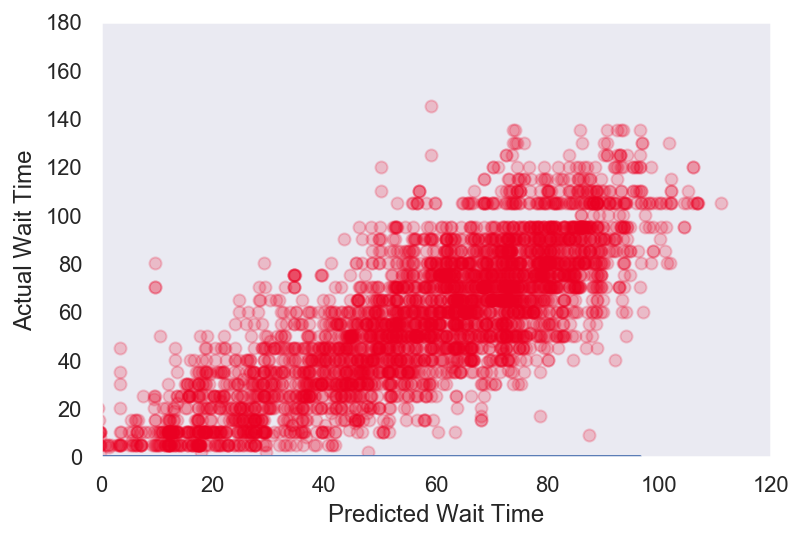

In [121]:
split_and_validate(X, y)

In [80]:
wait_model = sm.OLS(y, X, data=smaller_df) 
results = wait_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Wait_Time   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     923.9
Date:                Fri, 11 Oct 2019   Prob (F-statistic):               0.00
Time:                        04:01:44   Log-Likelihood:                -78510.
No. Observations:               18289   AIC:                         1.571e+05
Df Residuals:                   18252   BIC:                         1.574e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temp_(F)                     -0.2965      0.187     -1.589      0.112      -0.662       0.069
Dew_Point_(F)                 0.7645      0.176      4.347      0.000       0.420       1.109
Humidity_(%)                 -0.5880      0.078     -7.534      0.000      -0.741      -0.435
Wind_Speed_(mph)              0.0938      0.036      2.584      0.010       0.023       0.165
Wind_Gust_(mph)               0.0600      0.021      2.867      0.004       0.019       0.101
Pressure_(in)                -0.1328      0.159     -0.833      0.405      -0.445       0.180
Precip_(in)                  -6.6485      1.293     -5.141      0.000      -9.183      -4.114
Day_of_the_Week_Friday        8.0770      2.029      3.980      0.000       4.099      12.055
Day_of_the_Week_Monday       13.3996      2.049      6.540      0.000       9.383      17.416
Day_of_the_Week_Saturday      5.0038      2.038      2.455      0.014       1.008       8.999
Day_of_the_Week_Sunday       -0.5261      2.039     -0.258      0.796      -4.523       3.471
Day_of_the_Week_Thursday     14.1196      2.042      6.914      0.000      10.117      18.122
Day_of_the_Week_Tuesday      11.3117      2.009      5.630      0.000       7.373      15.250
Day_of_the_Week_Wednesday    19.2640      2.039      9.449      0.000      15.268      23.260
Hour_0                      -28.7095      3.459     -8.299      0.000     -35.490     -21.929
Hour_1                      -43.2894     16.878     -2.565      0.010     -76.371     -10.208
Hour_2                     1.366e-13   2.33e-14      5.852      0.000    9.09e-14    1.82e-13
Hour_6                    -1.123e-13    5.9e-14     -1.905      0.057   -2.28e-13    3.26e-15
Hour_7                      -31.6074      5.226     -6.048      0.000     -41.851     -21.364
Hour_8                      -32.9499      1.545    -21.323      0.000     -35.979     -29.921
Hour_9                      -21.3317      1.275    -16.735      0.000     -23.830     -18.833
Hour_10                       4.2553      1.277      3.331      0.001       1.751       6.759
Hour_11                      20.4246      1.298     15.740      0.000      17.881      22.968
Hour_12                      31.2770      1.310     23.882      0.000      28.710      33.844
Hour_13                      35.1969      1.312     26.828      0.000      32.625      37.768
Hour_14                      30.0384      1.315     22.844      0.000      27.461      32.616
Hour_15                      23.2439      1.296     17.933      0.000      20.703      25.784
Hour_16                      29.4140      1.293     22.754      0.000      26.880      31.948
Hour_17                      26.6222      1.270     20.963      0.000      24.133      29.112
Hour_18                      25.0201      1.262     19.825      0.000      